In [6]:
import time
import timeit
import numpy as np

from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.benchmarks import simulations as sims

In [7]:
def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

In [8]:
def mgc(X, Y):
    mgc = MGC(X, Y, None)
    # mgc_statistic, independence_test_metadata = mgc.test_statistic()
    p_value, metadata = mgc.p_value()  # p-value call has mgc.test_statistic() call
#     print("MGC stats from Python:")
#     print("MGC test statistic:", metadata["test_statistic"])
#     print("P Value:", p_value)
#     print("Optimal Scale:", metadata["optimal_scale"])

In [4]:
print("Linear data (varying num_samples)\n")
print("num_samples", "time_taken(in secs)")
num_samples_range = range(10, 151, 10)
linear_data = list()
for num_samples in num_samples_range:
    X, Y = sims.linear_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print(num_samples, time_taken)
    linear_data.append((num_samples, time_taken))
print()
print(linear_data)

Linear data (varying num_samples)

num_samples time_taken(in secs)
10 1.3580653140088543
20 3.7608664559957106
30 6.117521507985657
40 9.644708148989594
50 14.058805568987736
60 19.43968630998279
70 26.07025330598117
80 33.798428906011395
90 41.92650155702722
100 51.17532167999889
110 60.40161248500226
120 73.51667269697646
130 86.11600803901092
140 96.21977704099845
150 110.02171660697786

[(10, 1.3580653140088543), (20, 3.7608664559957106), (30, 6.117521507985657), (40, 9.644708148989594), (50, 14.058805568987736), (60, 19.43968630998279), (70, 26.07025330598117), (80, 33.798428906011395), (90, 41.92650155702722), (100, 51.17532167999889), (110, 60.40161248500226), (120, 73.51667269697646), (130, 86.11600803901092), (140, 96.21977704099845), (150, 110.02171660697786)]


In [6]:
# R code for benchmarking R MGC (r_performance.R)
# require("mgc")
# require("microbenchmark")

# print("Linear data (varying num_samples)")
# print("num_samples time_taken(in secs)")

# num_samples_range = seq(10, 150, by=10)
# linear_data <- list()
# i <- 1
# for (num_samples in num_samples_range){
#   data <- mgc.sims.linear(num_samples, 1, eps=0.1)
  
#   #start_time <- Sys.time()
#   #mgc.test(data$X, data$Y)
#   #end_time <- Sys.time()
  
#   #time_taken <- end_time - start_time
#   #time_taken <- as.numeric(time_taken, units = "secs")
  
#   time_taken <- microbenchmark(mgc.test(data$X, data$Y), times=5, unit="secs") # best of 5 executions
  
#   print(num_samples)
#   print(time_taken[1, 2]/(10^9))
#   linear_data <- c(linear_data, list("num_samples"=num_samples, "time_taken"=time_taken[1, 2]/(10^9)))
#   i <- i + 1
# }

# print(linear_data)

# Performace Data
# [1] 10
# [1] 1.225284
# [1] 20
# [1] 3.336518
# [1] 30
# [1] 6.566329
# [1] 40
# [1] 11.25737
# [1] 50
# [1] 16.9009
# [1] 60
# [1] 23.86574
# [1] 70
# [1] 34.10607
# [1] 80
# [1] 42.56408
# [1] 90
# [1] 61.35755
# [1] 100
# [1] 71.12478
# [1] 110
# [1] 92.81968
# [1] 120
# [1] 99.42997
# [1] 130
# [1] 120.6133
# [1] 140
# [1] 131.1176
# [1] 150
# [1] 159.2373

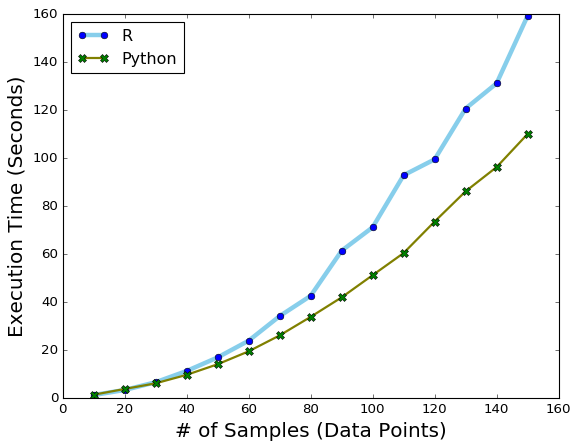

In [10]:
import matplotlib.pyplot as plt; plt.style.use('classic')
plt.rcParams["legend.loc"] = "best"
plt.rcParams['figure.facecolor'] = 'white'

num_samples = range(10, 151, 10)
r_perf_times = [1.225284, 3.336518, 6.566329, 11.25737, 16.9009, 23.86574, 34.10607, 42.56408, 61.35755, 71.12478, 92.81968, 99.42997, 120.6133, 131.1176, 159.2373]
# python_perf_times = [1.608677912998246, 4.2129362279956695, 7.686761507997289, 12.876448855007766, 18.506279226989136, 25.949373679992277, 35.11981585698959, 45.42150989199581, 56.92882612199173, 68.8296152260009, 81.11614266000106, 95.62930164599675, 120.72968827899604, 143.58189809900068, 169.66059989499627]
python_perf_times = [j for i, j in linear_data]


plt.plot(num_samples, r_perf_times, marker='o', markerfacecolor='blue', markersize=6, color='skyblue', linewidth=4, label="R")
plt.plot(num_samples, python_perf_times, marker='X', markerfacecolor='green', markersize=8, color='olive', linewidth=2, label="Python")
plt.xlabel('# of Samples (Data Points)', fontsize=18)
plt.ylabel('Execution Time (Seconds)', fontsize=18)
plt.legend()

In [27]:
print("Linear data (varying num_dimensions)\n")
num_dims_range = range(100, 1001, 100)
linear_data_dims = list()
for num_dims in num_dims_range:
    X, Y = sims.linear_sim(num_samp=10, num_dim=num_dims, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start

    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print("nums_dims:", num_dims, "time_taken (in secs):", time_taken)
    linear_data_dims.append((num_dims, time_taken))
print()
print(linear_data_dims)

Linear data (varying num_dimensions)

nums_dims: 100 time_taken (in secs): 1.6322504569980083
nums_dims: 200 time_taken (in secs): 1.7605915010062745
nums_dims: 300 time_taken (in secs): 1.777208691011765
nums_dims: 400 time_taken (in secs): 1.7736779630067758
nums_dims: 500 time_taken (in secs): 1.8358760929986602
nums_dims: 600 time_taken (in secs): 1.8216123840102227
nums_dims: 700 time_taken (in secs): 2.0647538140037796
nums_dims: 800 time_taken (in secs): 1.9504206029960187
nums_dims: 900 time_taken (in secs): 1.9636282050050795
nums_dims: 1000 time_taken (in secs): 1.9531981680047465

[(100, 1.6322504569980083), (200, 1.7605915010062745), (300, 1.777208691011765), (400, 1.7736779630067758), (500, 1.8358760929986602), (600, 1.8216123840102227), (700, 2.0647538140037796), (800, 1.9504206029960187), (900, 1.9636282050050795), (1000, 1.9531981680047465)]


In [25]:
print("Non-linear (spiral) data (varying num_samples)")
num_samples_range = range(10, 101, 10)
spiral_data = list()
for num_samples in num_samples_range:
    X, Y = sims.spiral_sim(num_samp=num_samples, num_dim=1, noise=0.1)

#     start = time.time()
#     mgc(X, Y)
#     end = time.time()
#     time_taken = end - start
    mgc_w = wrapper(mgc, X, Y)
    time_taken = min(timeit.repeat(mgc_w, repeat=5, number=1)) # best of 5 executions

    print("nums_dims:", num_samples, "time_taken (in secs):", time_taken)
    spiral_data.append((num_samples, time_taken))
print()
print(spiral_data)

Non-linear (spiral) data (varying num_samples)
nums_dims: 10 time_taken (in secs): 1.5979939620010555
nums_dims: 20 time_taken (in secs): 3.9707941100059543
nums_dims: 30 time_taken (in secs): 7.937399971997365
nums_dims: 40 time_taken (in secs): 13.300695457000984
nums_dims: 50 time_taken (in secs): 19.093872940997244
nums_dims: 60 time_taken (in secs): 26.14037140799337
nums_dims: 70 time_taken (in secs): 34.971699265995994
nums_dims: 80 time_taken (in secs): 45.653762695001205
nums_dims: 90 time_taken (in secs): 61.09912801900646
nums_dims: 100 time_taken (in secs): 70.50048310800048

[(10, 1.5979939620010555), (20, 3.9707941100059543), (30, 7.937399971997365), (40, 13.300695457000984), (50, 19.093872940997244), (60, 26.14037140799337), (70, 34.971699265995994), (80, 45.653762695001205), (90, 61.09912801900646), (100, 70.50048310800048)]
